In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def f(x):
    return 1/x - np.exp(x)

def df(x):
    return -1/x**2 - np.exp(x)

def g(x):
    return x - np.tan(x)

def dg(x):
    return 1 - (1/np.cos(x))**2

def h(x):
    return np.sin(x) + x**2 * np.cos(x) - x**2 - x

def dh(x):
    return np.cos(x) + 2*x*np.cos(x) - x**2 * np.sin(x) - 2*x - 1


In [424]:
def newton(f, df, x0, tol, max_iter):
    xk = []
    x = x0
    for i in range(max_iter):
        x = x - f(x)/df(x)
        xk.append(x)
        if abs(f(x)) < tol:
            break
        
    return x, i, xk

def bisection(f, a, b, tol, max_iter):
    xk = []
    for i in range(max_iter):
        c = (a + b)/2
        xk.append(c)
        if abs(f(c)) < tol:
            break
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
        
    return c, i, xk

def secant(f, a, b, tol, N):
    xk = []
    for i in range(N):
        if f(b) - f(a) == 0:
            break
        x = b - f(b)*(b - a)/(f(b) - f(a))
        xk.append(x)
        if abs(f(x)) < tol:
            break
        a = b
        b = x
        
    return x, i, xk

def modified_newton(f, df, x0, m, tol, max_iter):
    xk = []
    x = x0
    for i in range(max_iter):
        if df(x) == 0:
            break
        x = x - m*(f(x)/df(x))
        print(x)
        xk.append(x)
        if abs(f(x)) < tol:
            break
        
    return x, i, xk

def steffensen(f, x0, tol, max_iter):
    xk = []
    x = x0 
    for i in range(max_iter):
        if f(x + f(x)) - f(x) == 0:
            break
        x = x - (f(x)*f(x))/(f(x + f(x)) - f(x))
        print(x)
        xk.append(x)
        if abs(f(x)) < tol:
            break
        
    return x, i, xk

In [327]:
# run newton for f(x)
x0 = 0.1
tol = 1e-6
max_iter = 100
x, n, x_k = newton(f, df, x0, tol, max_iter)
print(f'f(x)=0 when x = {x:.10f}')

x0 = 4.3
tol = 1e-6
max_iter = 100
x, n, x_k = newton(g, dg, x0, tol, max_iter)
print(f'g(x)=0 when x = {x:.10f}')

# 0 of h(x) is 0
print(f'h(x)=0 when x = 0')

f(x)=0 when x = 0.5671432867
g(x)=0 when x = 4.4934094759
h(x)=0 when x = 0


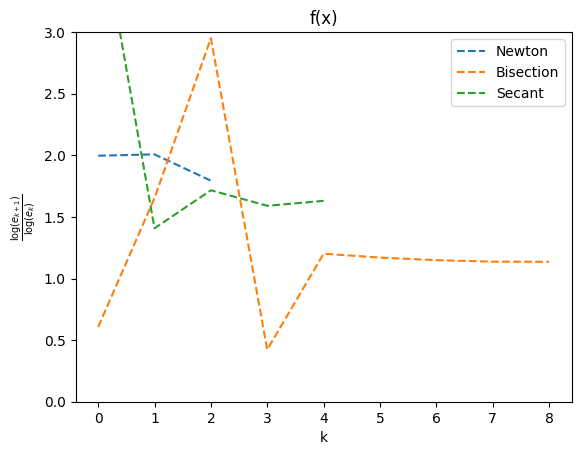

In [434]:
# run each method dfor each function and save the xk result
x0 = 1
tol = 1e-6
max_iter = 10
x, n, x_k = newton(f, df, x0, tol, max_iter)
newton_e_k = [np.log(np.abs(x_k[i]-0.5671432904))/np.log(np.abs(x_k[i-1]-0.5671432904)) for i in range(1,len(x_k))]

x0 = 0.01
x1 = 1
x, n, x_k = bisection(f, x0, x1, tol, max_iter)
bisection_e_k = [np.log(np.abs(x_k[i]-0.5671432904))/np.log(np.abs(x_k[i-1]-0.5671432904)) for i in range(1,len(x_k))]

x, n, x_k = secant(f, x0, x1, tol, max_iter)
secant_e_k = [np.log(np.abs(x_k[i]-0.5671432904))/np.log(np.abs(x_k[i-1]-0.5671432904)) for i in range(1,len(x_k))]

#plot the error for each method

plt.plot(newton_e_k, label='Newton',linestyle='--')
plt.plot(bisection_e_k, label='Bisection',  linestyle='--')
plt.plot(secant_e_k, label='Secant',  linestyle='--')
plt.title('f(x)')
plt.xlabel('k')
plt.ylabel(r'$\frac{\log(e_{k+1})}{\log(e_k)}$')
# y axis from 0 to 2
plt.ylim(0,3)

plt.legend()

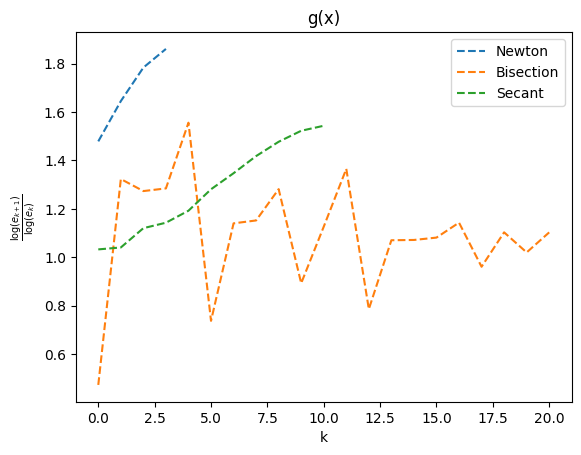

In [335]:
#run each method for g(x)
x0 = 4.6
tol = 1e-6
max_iter = 50
x, n, x_k = newton(g, dg, x0, tol, max_iter)
newton_e_k = [np.log(np.abs(x_k[i]-4.4934094579))/np.log(np.abs(x_k[i-1]-4.4934094579)) for i in range(1,len(x_k))]

x0 = 4.3
x1 = 4.7
x, n, x_k = bisection(g, x0, x1, tol, max_iter)
bisection_e_k = [np.log(np.abs(x_k[i]-4.4934094579))/np.log(np.abs(x_k[i-1]-4.4934094579)) for i in range(1,len(x_k))]

x0 = 4.3
x1 = 4.7
x, n, x_k = secant(g, x0, x1, tol, max_iter)
secant_e_k = [np.log(np.abs(x_k[i]-4.4934094579))/np.log(np.abs(x_k[i-1]-4.4934094579)) for i in range(1,len(x_k))]

#plot the error for each method
plt.plot(newton_e_k, label='Newton', linestyle='--')
plt.plot(bisection_e_k, label='Bisection', linestyle='--')
plt.plot(secant_e_k, label='Secant', linestyle='--')
plt.title('g(x)')
plt.xlabel('k')
plt.ylabel(r'$\frac{\log(e_{k+1})}{\log(e_k)}$')
plt.legend()

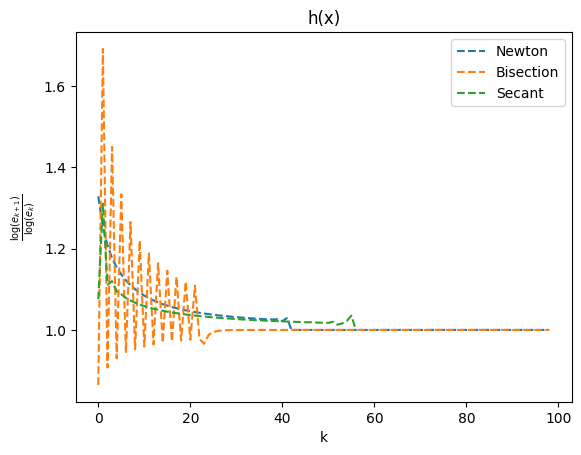

In [338]:
#run each method for h(x)
x0 = 0.5
tol = -np.inf
max_iter = 100
x, n, x_k = newton(h, dh, x0, tol, max_iter)
newton_e_k = [np.log(np.abs(x_k[i]))/np.log(np.abs(x_k[i-1])) for i in range(1,len(x_k))]

x0 = -0.2
x1 = 0.3
x, n, x_k = bisection(h, x0, x1, tol, max_iter)
bisection_e_k = [np.log(np.abs(x_k[i]))/np.log(np.abs(x_k[i-1])) for i in range(1,len(x_k))]

x, n, x_k = secant(h, x0, x1, tol, max_iter)
secant_e_k = [np.log(np.abs(x_k[i]))/np.log(np.abs(x_k[i-1])) for i in range(1,len(x_k))]
#plot the error for each method 
plt.plot(newton_e_k, label='Newton', linestyle='--')
plt.plot(bisection_e_k, label='Bisection', linestyle='--')
plt.plot(secant_e_k, label='Secant', linestyle='--')
plt.title('h(x)')
plt.xlabel('k')
plt.ylabel(r'$\frac{\log(e_{k+1})}{\log(e_k)}$')
plt.legend()


-0.24895209393782047
9.141766585459466
0.6682909675926272
0.11123484983256271
0.008515046570713503
7.009705064742536e-05
7.009705064742536e-05


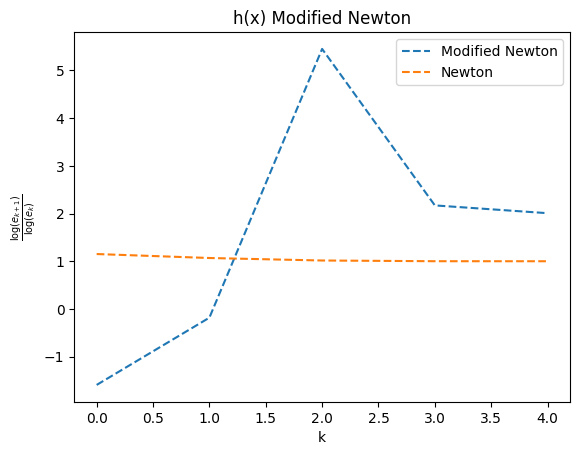

In [438]:
# run newtons modified method for h(x) with m = 3
x0 = -0.5
m = 3
tol = 1e-10
max_iter = 100
x, n, x_k = modified_newton(h, dh, x0, m, tol, max_iter)
print(x)
newton_e_k = [np.log(np.abs(x_k[i]))/np.log(np.abs(x_k[i-1])) for i in range(1,len(x_k))]

x, n, x_k = newton(h, dh, x0, tol, max_iter)
newton2_e_k = [np.log(np.abs(x_k[i]))/np.log(np.abs(x_k[i-1])) for i in range(1,len(x_k))]

plt.plot(newton_e_k, label='Modified Newton', linestyle='--')
plt.plot(newton2_e_k, label='Newton', linestyle='--')
plt.title('h(x) Modified Newton')
plt.xlabel('k')
plt.ylabel(r'$\frac{\log(e_{k+1})}{\log(e_k)}$')

plt.legend()


0.5671432905141682


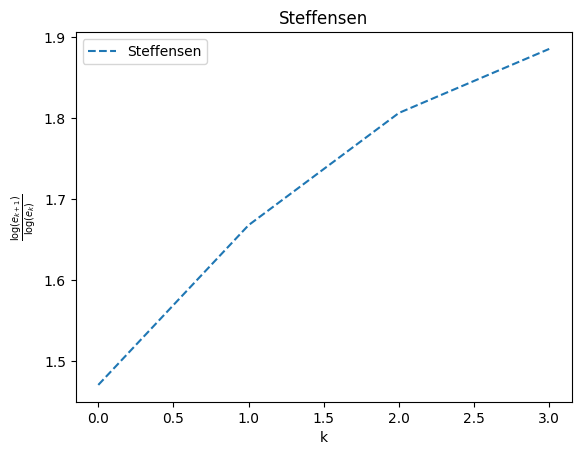

In [422]:
#steffensen method for f(x) 
x0 = 0.4
tol = 1e-6
max_iter = 5
x, n, x_k = steffensen(f, x0, tol, max_iter)
print(x)
steffensen_e_k = [np.log(np.abs(x_k[i]-0.5671432904))/np.log(np.abs(x_k[i-1]-0.5671432904)) for i in range(1,len(x_k))]
plt.plot(steffensen_e_k, label='Steffensen', linestyle='--')
plt.title('Steffensen')
plt.xlabel('k')
plt.ylabel(r'$\frac{\log(e_{k+1})}{\log(e_k)}$')
plt.legend()

4.489272539141293
4.4919085627556665
4.493207908471475
4.493405787163979
4.4934094566896325
4.4934094566896325


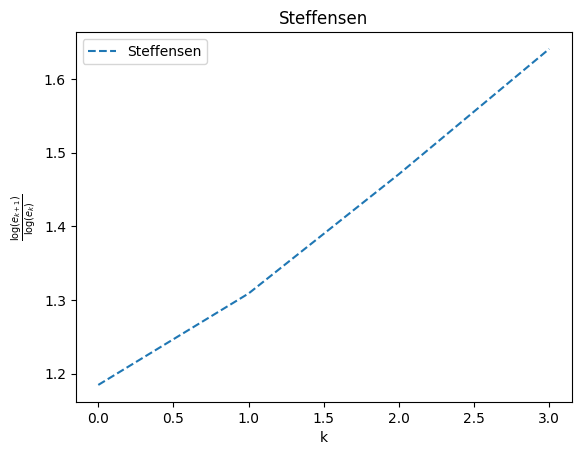

In [433]:
x0 = 4.5
tol = 1e-6
max_iter = 100
x, n, x_k = steffensen(g, x0, tol, max_iter)
print(x)
steffensen_e_k = [np.log(np.abs(x_k[i]-4.4934094579))/np.log(np.abs(x_k[i-1]-4.4934094579)) for i in range(1,len(x_k))]
plt.plot(steffensen_e_k, label='Steffensen', linestyle='--')
plt.title('Steffensen')
plt.xlabel('k')
plt.ylabel(r'$\frac{\log(e_{k+1})}{\log(e_k)}$')
plt.legend()

0.014153820892245844


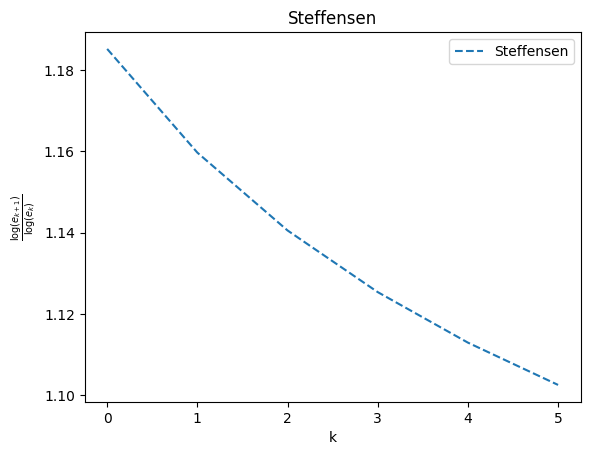

In [416]:
x0 = 0.2
tol = 1e-6
max_iter = 100
x, n, x_k = steffensen(h, x0, tol, max_iter)
print(x)
steffensen_e_k = [np.log(np.abs(x_k[i]))/np.log(np.abs(x_k[i-1])) for i in range(1,len(x_k))]
plt.plot(steffensen_e_k, label='Steffensen', linestyle='--')
plt.title('Steffensen')
plt.xlabel('k')
plt.ylabel(r'$\frac{\log(e_{k+1})}{\log(e_k)}$')
plt.legend()